# Proceso ETL para el FIFA 21 messy, raw dataset

Fuente: https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring

## Introducción y objetivos

Este conjunto de datos alberga información "cruda" (raw) acerca de jugadores dentro de la misma organización. En su contenido, se encuentran diversas variables que describen diferentes características de cada jugador. El propósito de este notebook es llevar a cabo una limpieza y transformación de este dataset, con el objetivo de facilitar, entre otras cosas, un análisis de datos más eficaz.



In [1]:
# Importamos las librerías

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import openpyxl

In [2]:
# En caso de usar Jupyter Notebook ejecutar esta linea para mostrar los gráficos

# %matplotlib inline

In [3]:
# Definimos parámetros comunes de nuestros gráficos

sns.set_style(style='dark')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (16, 9)

## Data Load/Carga de datos

In [4]:
# Leer el df

data_raw = pd.read_csv('/work/fifa21 raw data v2.csv')
data_raw.head()

/tmp/ipykernel_98/1317880737.py:3: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('/work/fifa21 raw data v2.csv')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


## Descripción del conjunto de datos utilizado.

In [5]:
# Observamos todos los registros en forma de texto

# with se encarga de que todos los recursos se liberen una vez ejecutada la celda

with pd.option_context('display.max_columns', None, 'display.max_colwidth', None):
    
    # Dentro de este bloque, se mostrarán todas las columnas y el contenido completo de cada celda
    
    print(data_raw.head())

       ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                                            playerUrl  \
0                http://sofifa.com/player/158023/lionel-messi/210006/   
1  http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/   
2                   http://sofifa.com/player/200389/jan-oblak/210006/   
3   

In [6]:
# Obtenemos las dimensiones del df

data_raw.shape

(18979, 77)

Tenemos 18979 registros y 77 variables

In [7]:
# Visualizamos el número, nombre y tipo de datos que contiene nuestro dataframe

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [8]:
#Visualizamos los tipos de variable que tenemos

(
    data_raw
    .dtypes
    .value_counts()
)

int64     54
object    23
Name: count, dtype: int64

In [9]:
#Renombramos nuestras columnas para estandarizar


# Reemplazamos espacios por guiones bajos (_) en todas las columnas 

(
    data_raw
    .rename(
        columns= lambda x: x.replace(' ','_'),
        inplace=True
    )
)

# Renombramos columnas

(
    data_raw
    .rename(
        columns={
            'Preferred_Foot':'Preferred_Foot',
            '↓OVA':'Overall_Rating',
            'BOV':'Best_Overall_Rating',
            'POT':'Potencial_Rating',
            'W/F':'Weak_foot',
            'SM':'Skill_Moves',
            'A/W':'Attacking Work_Rate',
            'D/W':'Defense_Work_Rate',
            'IR':'International_Reputation',
            'PAC':'Pace',
            'SHO':'Shooting',
            'PAS':'Passing',
            'DRI':'Dribbling',
            'DEF':'Defending'
        },
        inplace=True
    )
)

data_raw.head()


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,Overall_Rating,Potencial_Rating,Club,...,Attacking Work_Rate,Defense_Work_Rate,International_Reputation,Pace,Shooting,Passing,Dribbling,Defending,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


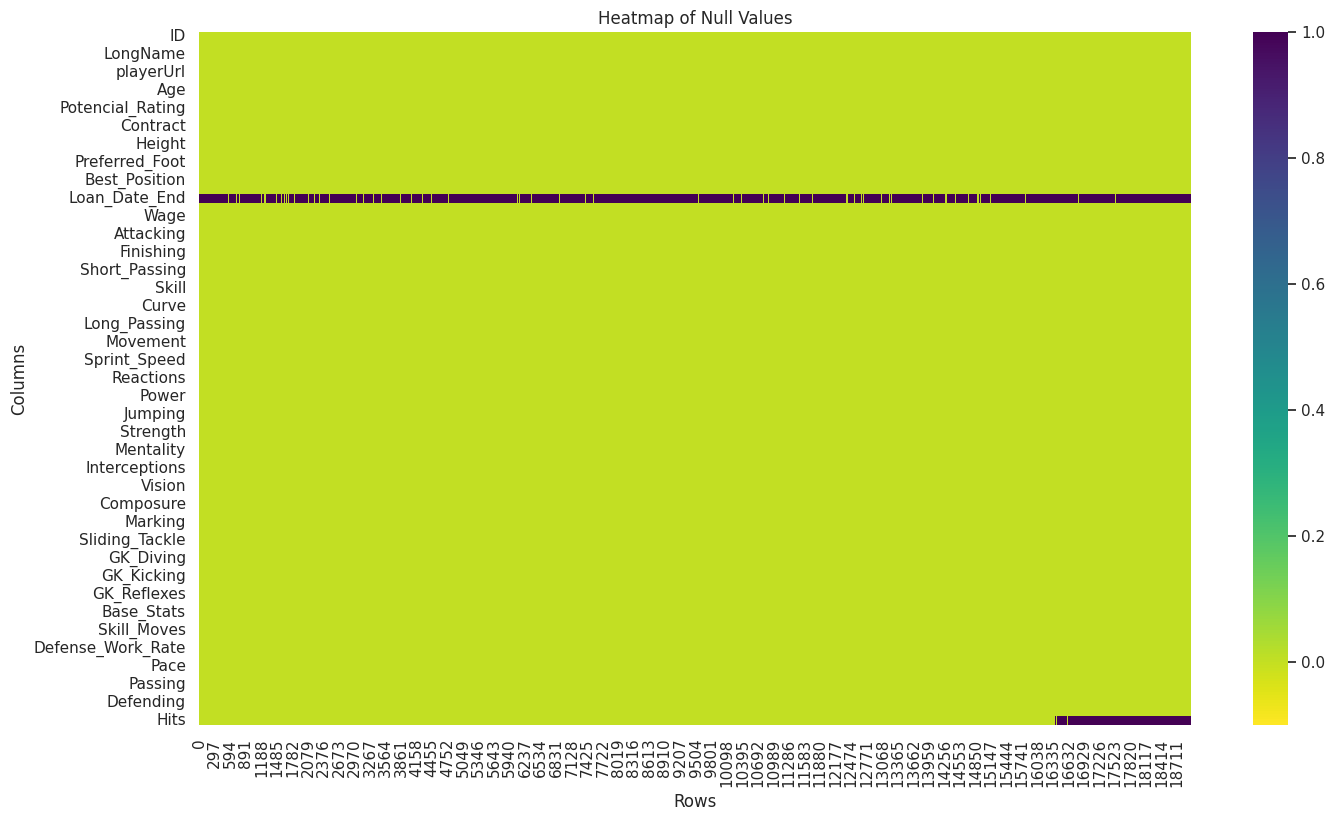

In [10]:
# Visualización de valores nulos
# Colores en sns: https://seaborn.pydata.org/tutorial/color_palettes.html

(
    data_raw
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df,
                cmap='viridis_r',
                vmax=0,
                vmin=1
            )
        )
    )
)

# Añadimos título y etiquetas

plt.title('Heatmap of Null Values')
plt.xlabel('Rows')
plt.ylabel('Columns')

#Mostramos el gráfico

plt.show()

In [11]:
# Eliminar columnas

(
    data_raw
    .drop(
        columns=[
            'photoUrl',
            'playerUrl',
            'Loan_Date_End',
            'PHY',
            'Hits'
        ],
        inplace=True
    )
)

In [12]:
# Observamos las dimensiones del df después del borrado

data_raw.shape

(18979, 72)

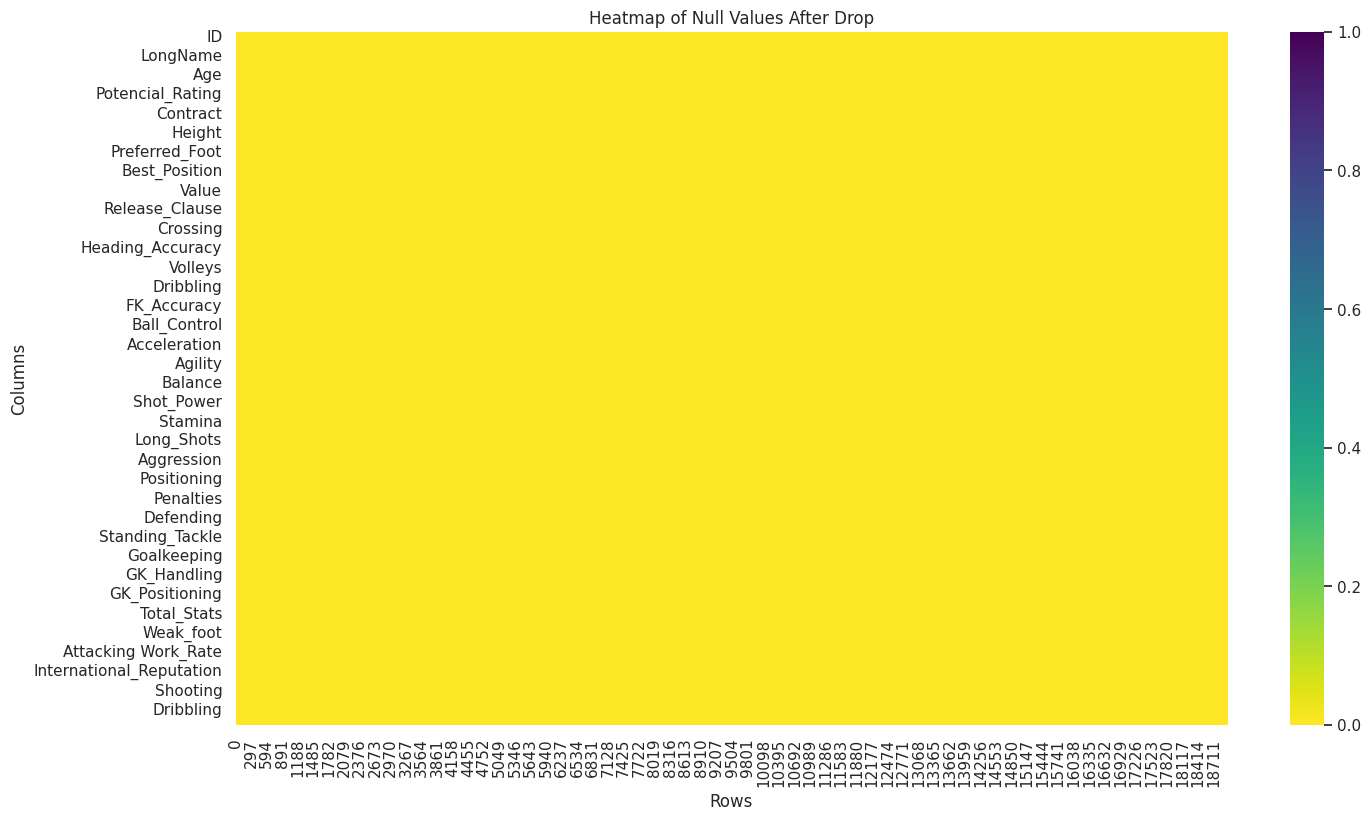

In [13]:
# Visualización de valores nulos después del borrado 

(
    data_raw
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df,
                cmap='viridis_r',
                vmax=1,
                vmin=0
            )
        )
    )
)

# Añadimos título y etiquetas

plt.title('Heatmap of Null Values After Drop')
plt.xlabel('Rows')
plt.ylabel('Columns')

#Mostramos el gráfico

plt.show()

## Data transform/Transformación de datos


### 1. División de la columna Contract

In [14]:
#Dividimos la  columna Contract en inicio y fin

data_raw[['Contract_Start', 'Contract_End']] = (
    data_raw['Contract']
    .str
    .split('~', expand=True) # expand le dice si hay que crear nuevas columnas
)

# Eliminamos la columna original

(
    data_raw
    .drop(
        columns= ['Contract'],
        inplace=True
    )
)


data_raw.head()

,ID,Name,LongName,Nationality,Age,Overall_Rating,Potencial_Rating,Club,Positions,Height,...,Attacking Work_Rate,Defense_Work_Rate,International_Reputation,Pace,Shooting,Passing,Dribbling,Defending,Contract_Start,Contract_End
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,"RW, ST, CF",170cm,...,Medium,Low,5 ★,85,92,91,95,38,2004,2021
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,"ST, LW",187cm,...,High,Low,5 ★,89,93,81,89,35,2018,2022
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,GK,188cm,...,Medium,Medium,3 ★,87,92,78,90,52,2014,2023
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,"CAM, CM",181cm,...,High,High,4 ★,76,86,93,88,64,2015,2023
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,"LW, CAM",175cm,...,High,Medium,5 ★,91,85,86,94,36,2017,2022


### 2. Conversión de las columnas 'Height' y 'Weight' a forma numérica.

In [15]:
# Due to the method we will use, we will convert the data to string type
# Por el método que usaremos, convertiremos los datos a tipo cadena

data_raw = (
    data_raw
    .astype({
        'Height':'string',
        'Weight':'string'
    })
)

# Validamos el cambio de tipos de datos

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 73 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        18979 non-null  int64 
 1   Name                      18979 non-null  object
 2   LongName                  18979 non-null  object
 3   Nationality               18979 non-null  object
 4   Age                       18979 non-null  int64 
 5   Overall_Rating            18979 non-null  int64 
 6   Potencial_Rating          18979 non-null  int64 
 7   Club                      18979 non-null  object
 8   Positions                 18979 non-null  object
 9   Height                    18979 non-null  string
 10  Weight                    18979 non-null  string
 11  Preferred_Foot            18979 non-null  object
 12  Best_Overall_Rating       18979 non-null  int64 
 13  Best_Position             18979 non-null  object
 14  Joined                

El cambio de tipo de datos a cadena es correcto

In [16]:
#  Displaying the data from the columns/Mostramos los datos de las columnas

data_raw[['Height','Weight']].sample(10)

,Height,Weight
1165,190cm,80kg
18804,175cm,70kg
4817,180cm,74kg
12794,192cm,85kg
4130,170cm,74kg
6502,192cm,91kg
16257,182cm,70kg
18784,183cm,76kg
16966,165cm,58kg
2349,176cm,70kg


Aquí podemos ver que Height y Weight son cadenas de texto y contienen tanto números como letras por lo tanto podemos extraer solo los números con la función de orden superior `filter`

In [17]:
# rename the columns to specify the units that each variable handles, for Height CM and for Weight KG
# Renombramos las columnas para que especifiquen las unidades que maneja cada variable, para la Altura CM y para el Peso KG

data_raw = (
    data_raw
    .rename(
        columns={
            'Height':'Height(m)',
            'Weight':'Weight(kg)'
        }
    )
)

In [18]:
# Creamos una función que extraiga los numeros del df

def extract_numbers(string):

    # Creamos una variable cadena que recibirá los datos filtrados si cumplen la condicion de ser números
    num = ''.join(filter(str.isdigit,string))
    
    # Regresamos la variable
    return num

In [19]:
# Aplicamos la función a la columna Height

data_raw['Height(m)'] = data_raw['Height(m)'].apply(extract_numbers)
data_raw['Height(m)'].head()

0    170
1    187
2    188
3    181
4    175
Name: Height(m), dtype: object

In [20]:
# Apply the function to the Weight column/Aplicamos la función a la columna Weight

data_raw['Weight(kg)'] = data_raw['Weight(kg)'].apply(extract_numbers)
data_raw['Weight(kg)'].head()

0    72
1    83
2    87
3    70
4    68
Name: Weight(kg), dtype: object

In [21]:
# Convert the data to integer type/Convertimos los datos a tipo int

data_raw = (
    data_raw
    .astype({
        'Height(m)':'float64',
        'Weight(kg)':'int64'
    })
)

In [22]:
# Dividimos sobre 100 la columna Height para estandarizar nuestras unidades a metros

data_raw['Height(m)'] = data_raw['Height(m)'].apply(lambda x: x/100)

In [23]:
# Visualizamos 

data_raw[['Height(m)','Weight(kg)']].sample(10)

,Height(m),Weight(kg)
2737,1.68,66
13606,1.83,85
10254,1.84,73
4830,1.78,72
3226,1.91,82
1650,1.92,91
11111,1.74,64
13619,1.76,78
8595,1.82,70
8347,1.87,73


Nuestra transformación fue correcta, ahora podríamos, por ejemplo calcular el IMC en una nueva columna

### 3. Eliminación de caracteres de nueva línea en todas las columnas.

Eliminación de caracteres de nueva línea en todas las columnas.

In [24]:
# Apply a lambda function to remove the newline characters/Aplicamos una lambda para eliminar los saltos de linea

data_raw = (
    data_raw
    .applymap(
        lambda x: x.strip() if isinstance(x,str) else x
    )
)

# Apply a lambda function to remove spaces within the strings/Aplicamos una lambda para eliminar los espacios en las cadenas

data_raw = (
    data_raw
    .applymap(
        lambda x: x.lstrip() if isinstance(x,str) else x
    )
)

data_raw['Club'].sample(10)

/tmp/ipykernel_98/4135859250.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_raw
/tmp/ipykernel_98/4135859250.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_raw


18580        FC Hermannstadt
11301             Shrewsbury
9862     Peterborough United
13173            Southampton
6597        Atiker Konyaspor
3843               Al Ain FC
10111      Bayern München II
17897              Monterrey
14398           Lincoln City
15034      Wycombe Wanderers
Name: Club, dtype: object

La eliminación de datos fue correcto

### 4. Conversión de columnas de tipo string ('Value', 'Wage'y 'Release') a números.

#### 4.1 Convertir 'Value' a numeros

In [25]:
data_raw['Value'].sample(10)

275      €30.5M
9964      €875K
858        €14M
11034     €875K
14586     €625K
9644      €1.7M
16914     €400K
13839     €775K
1882        €5M
18171     €240K
Name: Value, dtype: object

La forma de solucionar este problema será quitar el simbolo de euros con `lstrip` y después tranformar los miles (k) a millones dividiendo sobre 1000. Por último eliminar la 'K' o 'M'

In [26]:
# Rename the columns/Renombramos las columnas

data_raw = (
    data_raw
    .rename(
        columns={
            'Value':'Value(M)'
        }
    )
)

In [27]:
# Eliminamos el símbolo de euros

data_raw['Value(M)'] = (
    data_raw['Value(M)']
    .apply(
        lambda x: x.lstrip('€') if isinstance(x, str) else x
    )
)

data_raw['Value(M)'].sample(10)


15563    500K
10010    675K
6743       1M
16567    325K
18193    200K
2313       5M
13870    550K
4183     4.1M
14333    700K
14504    425K
Name: Value(M), dtype: object

In [28]:
# Definimos la función para transformar a millones

def millions(arr):

    # Si son miles (K)
    if 'K' in arr:
        
        # Elimina K y vuelvelo un valor flotante
        arr = float(arr.replace('K',''))

        #Regresa el valor divido sobre mil (para leerlo en millones)
        return arr/1000

    # Si no si está son millones    
    elif 'M' in arr:
        
        # Solo reempalza M y devuelvelo 
        arr = float(arr.replace('M',''))
        return arr

    # Si no se cumple la condición devuelve la variable de entrada
    else:
        return arr

In [29]:
# Aplicamos la función sobre la columna Value(M)

data_raw['Value(M)'] = data_raw['Value(M)'].apply(millions)

In [30]:
# Convertimos a un valor flotante la columna Value(M)

data_raw = (
    data_raw
    .astype({
        'Value(M)':'float64'
    })
)

data_raw['Value(M)'].sample(10)

14580    0.35
4743     1.60
1444     0.00
7093     1.40
17512    0.35
5737     1.50
8154     1.10
17050    0.16
14256    0.70
3981     0.90
Name: Value(M), dtype: float64

#### 4.2 Convertir 'Wage' a numeros

In [31]:
# Renombramos para estandarizar

data_raw = (
    data_raw
    .rename(
        columns={
            'Wage':'Wage(K)'
        }
    )
)

In [32]:
data_raw['Wage(K)'].sample(10)

11863     €1K
12104    €650
15461     €6K
8686      €4K
2040     €19K
6362     €32K
3854      €6K
3003     €43K
8929      €5K
18211    €800
Name: Wage(K), dtype: object

In [33]:
#Eliminamos el simbolo de euros

data_raw['Wage(K)'] = (
    data_raw['Wage(K)']
    .apply(
        lambda x: x.lstrip('€')
    )
)

data_raw['Wage(K)'].sample(10)

17627    500
11353     4K
11050     3K
12935     7K
15043     3K
11582    750
14891     2K
163      58K
15629     1K
9135      3K
Name: Wage(K), dtype: object

In [34]:
# Creamos una función para transformar en miles (K) la columna

def kilos(arr):

    # Si son miles (K)

    if 'K' in arr:

        # reemplaza elimina K y vuelvelo flotante

        arr = float(arr.replace('K', ''))

        #Devuelve el valor

        return arr

    # Si no está en miles

    else:

        # Divide el valor sobre 1000 y vuelvelo flotante 

        arr = float(arr) / 1000

        # Devuelve el resultado
        
        return arr


In [35]:
# Aplicamos la función a nuestra columna

data_raw['Wage(K)'] = (
    data_raw['Wage(K)']
    .apply(
        kilos
    )
)

# Visualizamos el resultado

data_raw['Wage(K)'].sample(10)

2485     14.00
9021      3.00
792      27.00
6299      9.00
6462      0.50
10246     0.50
12477     2.00
11969     0.95
9070      0.50
11028     9.00
Name: Wage(K), dtype: float64

#### 4.3 Convertir 'Release_Clause' a numeros

In [36]:
# Renombramos para estandarizar

data_raw = (
    data_raw
    .rename(
        columns={
            'Release_Clause':'Release_Clause(M)'
        }
    )
)

In [37]:
data_raw = (
    data_raw
    .astype({
        'Release_Clause(M)':'string'
    })
)


In [38]:
data_raw['Release_Clause(M)'] = (
    data_raw['Release_Clause(M)']
    .apply(
        lambda x: str(x).lstrip('€')
    )
)

data_raw['Release_Clause(M)'].sample(10)

3834      4.1M
8941      689K
3412        8M
5800      3.2M
5627      3.2M
2258     16.8M
7641        1M
1957     18.9M
14596     881K
8323         0
Name: Release_Clause(M), dtype: object

In [39]:
data_raw['Release_Clause(M)'] = (
    data_raw['Release_Clause(M)']
    .apply(
        millions
    )
)

data_raw['Release_Clause(M)'].sample(10)

4574       2.5
16933     0.49
9466      0.86
11666      1.7
18160    0.104
1238       7.1
14780     0.39
18746    0.143
13969    0.217
14510        0
Name: Release_Clause(M), dtype: object

In [40]:
data_raw['Release_Clause(M)'].sample(10)

10422    0.953
139       36.1
17866    0.374
17186    0.062
16132    0.347
12989    0.689
15070    0.988
11262      1.1
14953        0
15089    0.399
Name: Release_Clause(M), dtype: object

### 5. Dividir columna Joined

In [41]:
# Convertimos nuestra columna de fechas a datetime

data_raw['Joined'] = pd.to_datetime(data_raw['Joined']) # Convertimos a tipo fecha (datetime)

data_raw['Joined'].sample(10)

10484   2020-09-23
14356   2019-07-01
14097   2020-08-13
11699   2020-07-01
7615    2019-08-27
2310    2018-07-01
964     2019-07-01
16301   2020-01-08
16935   2020-10-05
574     2017-07-01
Name: Joined, dtype: datetime64[ns]

In [42]:
#Extraemos el año

data_raw['Joined(year)'] = data_raw['Joined'].dt.year
data_raw['Joined(year)'].sample(10)

18636    2020
5122     2018
6712     2017
14381    2017
18738    2019
11847    2020
15333    2020
10376    2020
5751     2017
15266    2018
Name: Joined(year), dtype: int32

In [43]:
# Extraemos el mes

data_raw['Joined(month)'] = data_raw['Joined'].dt.month
data_raw['Joined(month)'].sample(10)

11204     6
17088     7
12281    10
6292      9
5461      1
7300      7
4632      7
4757      7
16546     3
15743     7
Name: Joined(month), dtype: int32

In [44]:
#Extraemos el día

data_raw['Joined(day)'] = data_raw['Joined'].dt.day
data_raw['Joined(day)'].sample(10)

4267      1
319      11
17924    24
6250      1
15131     8
6440      1
11933    10
8509      6
12589     1
3477     13
Name: Joined(day), dtype: int32

### 6. Convertir Preferred_Foot a una variable numérica

In [45]:
# Creamos una lambda para reemplazar 'Right' por 0 y 'Left' por 1

data_raw = (
    data_raw
    .assign(
        numeric_pf=lambda d: d.Preferred_Foot.replace(['Right', 'Left'], [int(0), int(1)])
    )
)

data_raw

,ID,Name,LongName,Nationality,Age,Overall_Rating,Potencial_Rating,Club,Positions,Height(m),...,Shooting,Passing,Dribbling,Defending,Contract_Start,Contract_End,Joined(year),Joined(month),Joined(day),numeric_pf
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",1.70,...,92,91,95,38,2004,2021,2004,7,1,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,"ST, LW",1.87,...,93,81,89,35,2018,2022,2018,7,10,0
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,GK,1.88,...,92,78,90,52,2014,2023,2014,7,16,0
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,"CAM, CM",1.81,...,86,93,88,64,2015,2023,2015,8,30,0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",1.75,...,85,86,94,36,2017,2022,2017,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,Wuhan Zall,CB,1.78,...,28,26,38,48,2018,2022,2018,7,13,0
18975,258760,B. Hough,Ben Hough,England,17,47,67,Oldham Athletic,CM,1.75,...,40,48,49,35,2020,2021,2020,8,1,0
18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,Derry City,CM,1.79,...,39,44,46,40,2019,2020,2019,3,8,0
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,RW,1.75,...,49,41,49,30,2020,2022,2020,9,22,0


In [46]:
data_raw.head()

,ID,Name,LongName,Nationality,Age,Overall_Rating,Potencial_Rating,Club,Positions,Height(m),...,Shooting,Passing,Dribbling,Defending,Contract_Start,Contract_End,Joined(year),Joined(month),Joined(day),numeric_pf
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",1.70,...,92,91,95,38,2004,2021,2004,7,1,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,"ST, LW",1.87,...,93,81,89,35,2018,2022,2018,7,10,0
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,GK,1.88,...,92,78,90,52,2014,2023,2014,7,16,0
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,"CAM, CM",1.81,...,86,93,88,64,2015,2023,2015,8,30,0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",1.75,...,85,86,94,36,2017,2022,2017,8,3,0


In [47]:
# Exportamos nuestro dataset

data_raw.to_excel('fifa21_processed.xlsx',index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39ee0769-0977-4025-b403-d8e7fd55c200' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>